
# <font color="firebrick"><u>**Trabajo Final Diplomatura Data Science - 07/10/2021**</u></font>

## <font color="firebrick"><u>**Ing. Viviana L. Colombo**</u></font>

## "Estudio del gasto de los Pacientes Covid-19 positivo en los últimos 16 meses, de acuerdo a su comportamiento médico prestacional."

<font color="firebrick">**--------------------------------------------------------------------------------------------------------------------------------------------**</font>

In [ ]:
# Instalaciones que realicé en mi equipo:

!pip install pyclustertend
!pip install ipywidgets
!pip install fuzzy-c-means
!pip install yellowbrick
!pip install openpyxl
!pip install hdbscan
!pip install altair
!pip install vega_datasets

#!pip install HDBSCAN
# No pude instalarlo

In [469]:
# Importaciones realizadas

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score,v_measure_score
from sklearn.preprocessing import MinMaxScaler

from itertools import combinations
from pyclustertend import hopkins
from fcmeans import FCM
import hdbscan 
import statsmodels.api as sm
import os
from mpl_toolkits import mplot3d
# from yellowbrick.cluster import silhouette_visualizer
from yellowbrick.cluster import InterclusterDistance, KElbowVisualizer, SilhouetteVisualizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from openpyxl import Workbook

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation
import scipy.cluster.hierarchy as shc
from vega_datasets import data
import altair as alt

In [288]:
# style must be one of white, dark, whitegrid, darkgrid, ticks
sns.set(style="darkgrid", font_scale=1.1)

#### El dataset contiene información de **Pacientes Covid-19 positivo durante los últimos 16 meses**.

#### **El mismo contiene datos ficticios, modificados para fines educativos y NO contiene datos personales.**

#### <font color="firebrick"><u>**No está autorizada su difusión.**</u></font>

In [289]:
# Carga del archivo csv

# Para Jupyter lab
pacientes_covid = pd.read_csv("C:\Pacientes_Covid_jup.csv",delimiter=";")

# Para google.colab:
#from google.colab import files 
#uploaded = files.upload()


In [290]:
pacientes_covid = pd.read_csv("Pacientes_Covid.csv",delimiter=";")

In [291]:
pacientes_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id_paciente        900 non-null    int64
 1   edad               900 non-null    int64
 2   gasto_total        900 non-null    int64
 3   fallecido          900 non-null    int64
 4   sexo               900 non-null    int64
 5   consultas_medicas  900 non-null    int64
 6   tipo_internacion   900 non-null    int64
 7   estudios_diag      900 non-null    int64
 8   analisis_bioq      900 non-null    int64
 9   psicoterapia       900 non-null    int64
 10  kinesiologia       900 non-null    int64
dtypes: int64(11)
memory usage: 77.5 KB



**Breve descripción del contenido del dataset**

- **0- id_paciente:** es un identificador único para cada paciente, generado aleatoriamente.

- **1- edad:** es la edad actual de cada paciente. En el caso de pacientes fallecidos, es la edad al momento del fallecimiento.

- **2- gasto_total:** es el monto erogado por dicho paciente en el último año, en concepto de prestaciones médicas de todo tipo.

- **3- fallecido:** contiene los valores **0 o 1**. El valor 1 indica que falleció.

- **4- sexo:**  contiene los valores **0 o 1**. El valor 0 es Mujer y 1 es Hombre.

- **5- consultas_medicas:** contiene los valores **0 o 1**. En caso que haya requerido alguna consulta médica en el último año, contendrá el valor 1, independientemente de la cantidad que haya utilizado.

- **6- tipo_internacion:** contiene los valores **0, 1 o 2**. El valor 0 indica que no requirió ser internado. El valor 1 indica que fue internado en piso. El valor 2 indica que requirió ser internado en terapia intensiva (de cualquier tipo, con o sin utilización de respirador).

- **7- estudios_diag:** contiene los valores **0 o 1**. El valor 1 indica que requirió algún estudios de diagnóstico médico, como por ejemplo: radiografía, ecografía, tomografía, resonancia, etc.

- **8- analisis_bioq:** contiene los valores **0 o 1**. El valor 1 indica que requirió algún análisis bioquímicos de algún tipo y complejidad.

- **9- psicoterapia:** contiene los valores **0 o 1**. El valor 1 indica que requirió alguna sesión de psicoterapia o psiquiatría.

- **10- kinesiología:** contiene los valores **0 o 1**. El valor 1 indica que requirió alguna sesión de kinesiología, de cualquier tipo.

In [292]:
pacientes_covid.head().reset_index()

index  id_paciente  edad  gasto_total  fallecido  sexo  consultas_medicas  \
0      0      1236221    86       491110          1     1                  1   
1      1      1236222    81       487170          1     1                  1   
2      2      1236223    81       440370          0     1                  1   
3      3      1236224    73       437730          0     0                  1   
4      4      1236225    66       437270          1     0                  1   

   tipo_internacion  estudios_diag  analisis_bioq  psicoterapia  kinesiologia  
0                 2              1              1             0             1  
1                 2              1              1             1             1  
2                 2              1              1             0             1  
3                 2              1              1             0             1  
4                 2              1              1             0             1

### <font color="firebrick"><u>**ANALISIS EXPLORATORIO DE DATOS (EDA)**</u></font>

Gráficos más importantes:

In [293]:
# Divido el dataset en dos para facilitar visualización 
covid_reduc = pacientes_covid.iloc[:, [1, 2, 6, 3, 4]]
covid_reduc2 = pacientes_covid.iloc[:, [5, 7, 8, 9, 10]]

#covid_reduc
#covid_reduc2

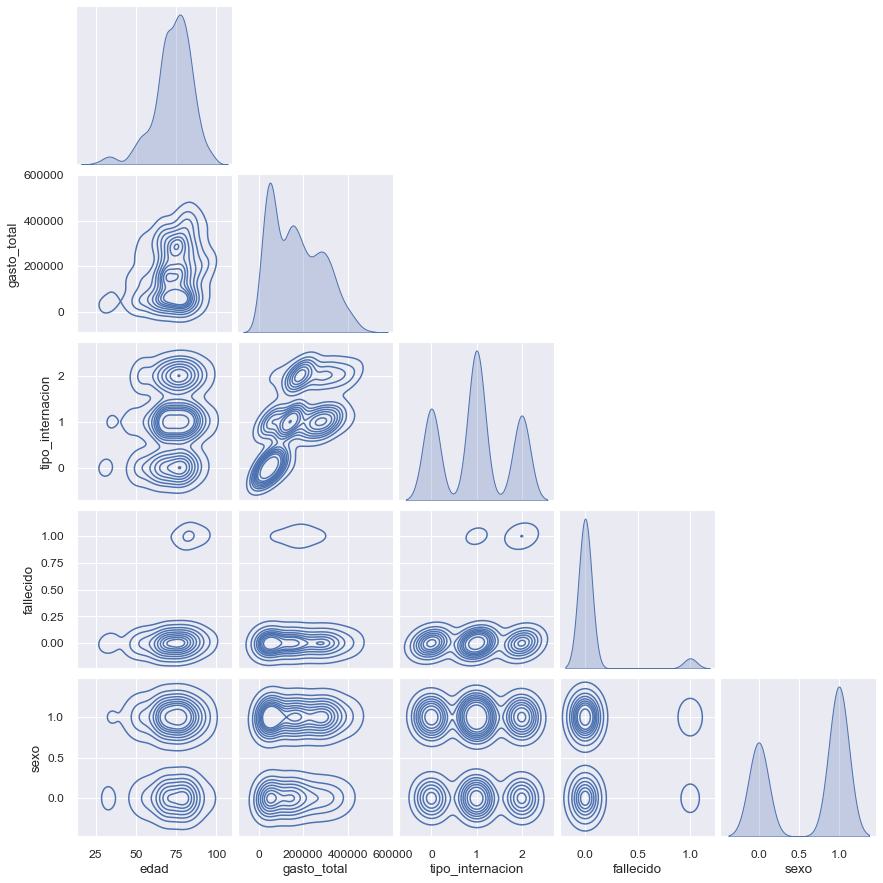

In [294]:
# Acá grafico las variables más importantes
sns.pairplot(data=covid_reduc, kind="kde", corner=True);

Muestro estos gráficos en forma general de las variables más importantes, pero después los analizo en detalle en los próximos gráficos.

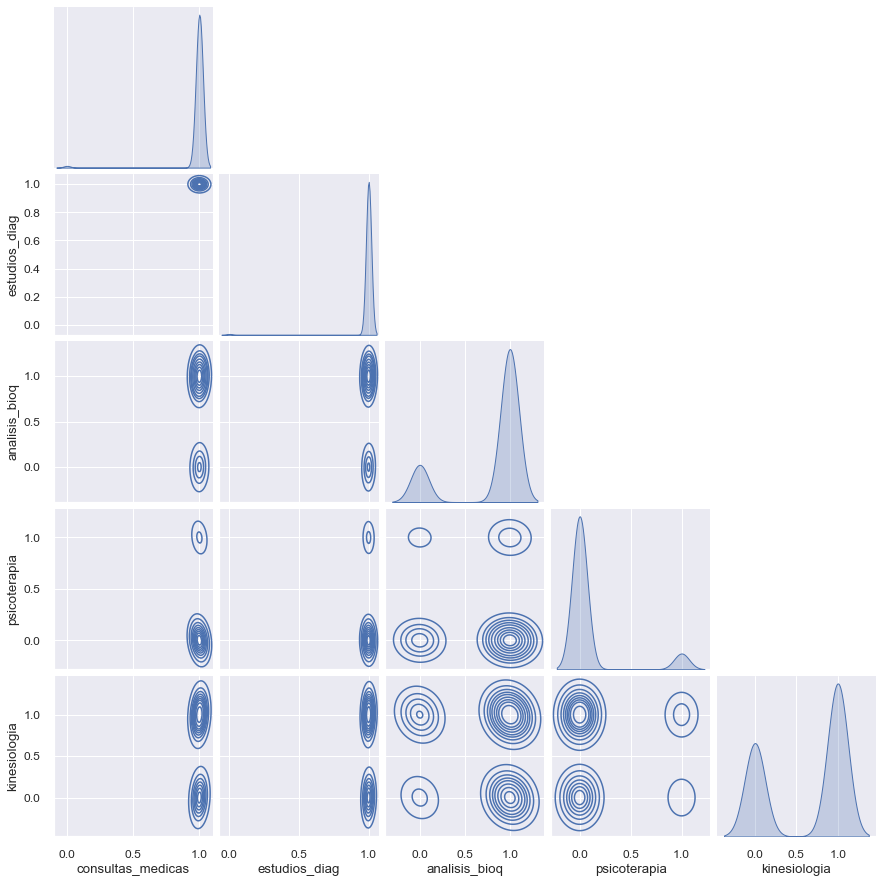

In [295]:
# Acá grafico la mayoría de las variables que son ceros y unos
sns.pairplot(data=covid_reduc2, kind="kde", corner=True);

La mayoría de los pacientes covid positivos utilizó consultas médicas y se realizaron estudios de diagnóstico.
Las prácticas de kinesiología y los análisis bioquímicos fueron muy requeridas en los pacientes covid positivo.
La mayoría no tuvieron sesiones de psicoterapia.

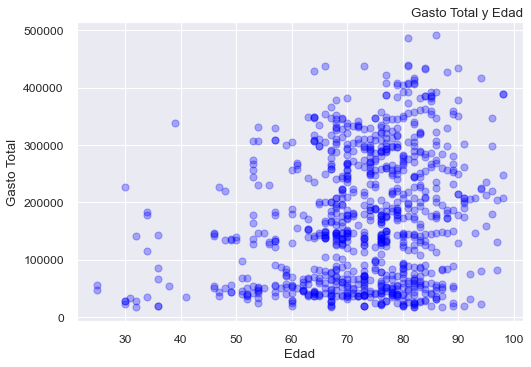

In [297]:
plt.scatter(pacientes_covid['edad'], pacientes_covid['gasto_total'], c='blue', s=50, alpha=0.3)
plt.xlabel('Edad')
plt.ylabel('Gasto Total')
plt.title('Gasto Total y Edad', loc = 'right')
plt.show()

Como expliqué en el documento adjunto, los pocos casos con gastos totales muy superiores a $500.000 en el período de análisis fueron descartados, por considerarse outliers (pacientes con patologías de base muy costosas).

Se puede observar gran variedad de gastos totales, principalmente para los mayores de 60 años.

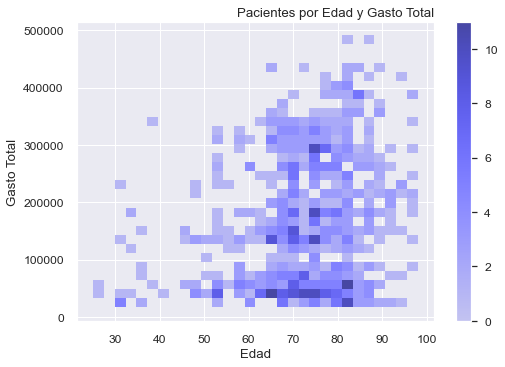

In [298]:
# Otra forma de graficar lo mismo, con la escala a la derecha
sns.histplot (x="edad", y="gasto_total", data=pacientes_covid, 
bins = 30, cbar = "true" ,  color = "blue")
plt.xlabel('Edad')
plt.ylabel('Gasto Total')
plt.title('Pacientes por Edad y Gasto Total', loc = 'right');

Nuevamente la escala con la cantidad de pacientes muestra mayor cantidad en los mayores de 60 años.

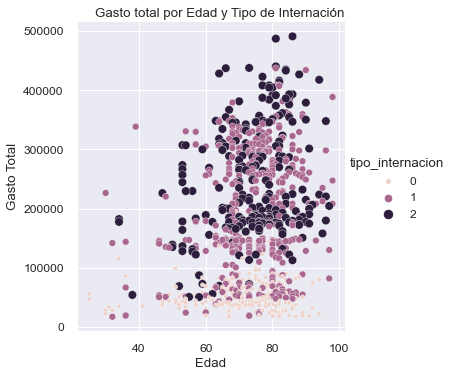

In [299]:
sns.relplot(x="edad", hue="tipo_internacion", y="gasto_total", data=pacientes_covid, size = 'tipo_internacion');
plt.xlabel('Edad')
plt.ylabel('Gasto Total')
plt.title('Gasto total por Edad y Tipo de Internación', loc = 'right');

En este gráfico se pueden visualizar los Gastos Totales por Edad y Tipo de Internación, notándose en color negro los mayores egresos para los internados en UTI (2) y los internados en piso (1), color rosa más fuerte.
Los no internados (0) color rosa suave fueron los de menores gastos totales en el período.

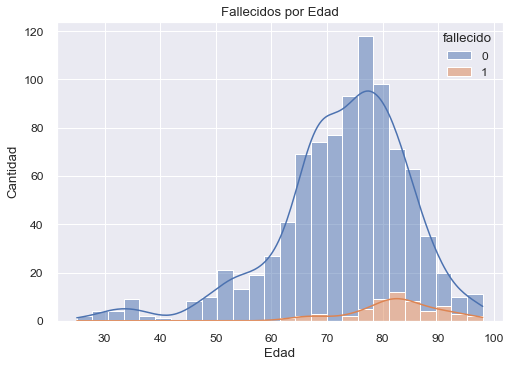

In [300]:
sns.histplot(x="edad", hue="fallecido", data=pacientes_covid, kde=True, multiple = "stack");
plt.ylabel('Cantidad')
plt.xlabel('Edad')
plt.title('Fallecidos por Edad', loc = 'center')
plt.show()

En este gráfico se puede observar que los más fallecidos fueron mayores de 60 años.

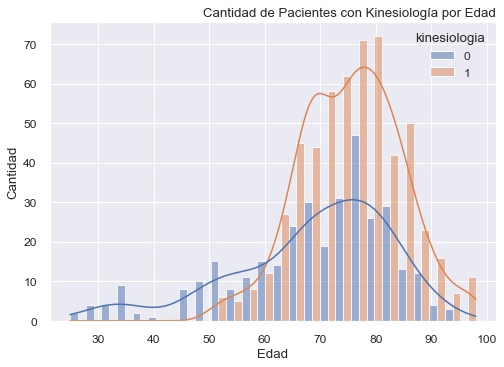

In [301]:
# Diferentes parámetros de `multiple`: ['layer', 'stack', 'fill', 'dodge']
sns.histplot(x="edad", hue="kinesiologia", data=pacientes_covid, kde=True, color="royalblue", multiple = "dodge");
plt.ylabel('Cantidad')
plt.xlabel('Edad')
plt.title('Cantidad de Pacientes con Kinesiología por Edad', loc = 'right')
plt.show();

Las prácticas de kinesiología tuvieron mucha importancia en los pacientes covid positivo. 
Se puede visualizar gran cantidad de pacientes con kinesiología mayores de 60 años (valor 1).

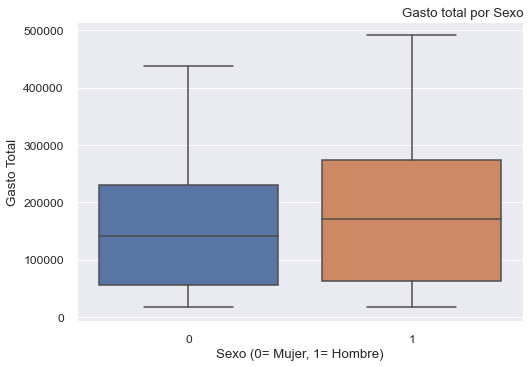

In [302]:
sns.boxplot(x="sexo", y="gasto_total", data=pacientes_covid)
#sns.boxplot(x="sexo", y="gasto_total", hue="fallecido", data=pacientes_covid)
plt.xlabel('Sexo (0= Mujer, 1= Hombre)')
plt.ylabel('Gasto Total')
plt.title('Gasto total por Sexo', loc = 'right');

No hay una diferenciación importante del gasto total por sexo, ambos tuvieron egresos significativos, sólo se observa un poco más en hombres. 

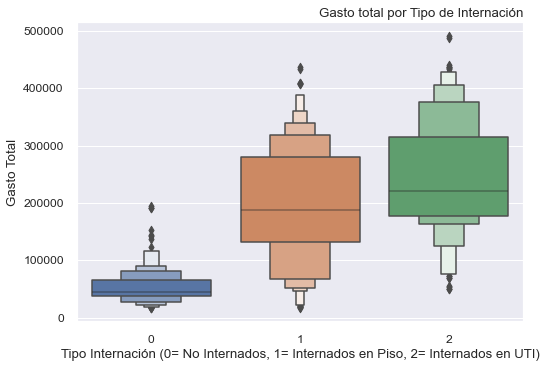

In [303]:
sns.boxenplot(x="tipo_internacion", y="gasto_total", data=pacientes_covid)
plt.xlabel('Tipo Internación (0= No Internados, 1= Internados en Piso, 2= Internados en UTI)')
plt.ylabel('Gasto Total')
plt.title('Gasto total por Tipo de Internación', loc = 'right');

Sin dudas que los mayores gastos se dieron en los pacientes covid internados.

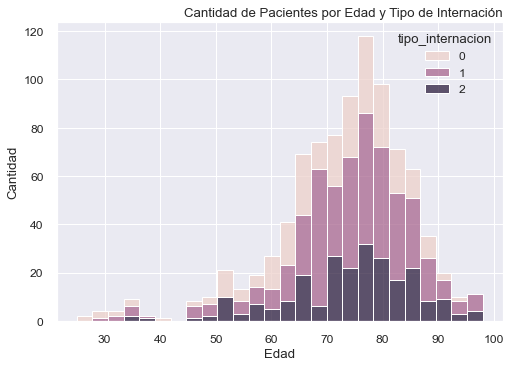

In [305]:
sns.histplot(x="edad", hue="tipo_internacion", data=pacientes_covid, color="royalblue", multiple = "stack")
plt.xlabel('Edad')
plt.ylabel('Cantidad')
plt.title('Cantidad de Pacientes por Edad y Tipo de Internación', loc = 'right');

Este gráfico muestra que la mayoría de los pacientes covid positivos son mayores de 60 años y son los que más estuvieron internados, tanto en piso como en UTI.

In [308]:
# Combinación de variables de este dataset

lst_vars=list(combinations(pacientes_covid.columns,2))
lst_vars

[('id_paciente', 'edad'),
 ('id_paciente', 'gasto_total'),
 ('id_paciente', 'fallecido'),
 ('id_paciente', 'sexo'),
 ('id_paciente', 'consultas_medicas'),
 ('id_paciente', 'tipo_internacion'),
 ('id_paciente', 'estudios_diag'),
 ('id_paciente', 'analisis_bioq'),
 ('id_paciente', 'psicoterapia'),
 ('id_paciente', 'kinesiologia'),
 ('edad', 'gasto_total'),
 ('edad', 'fallecido'),
 ('edad', 'sexo'),
 ('edad', 'consultas_medicas'),
 ('edad', 'tipo_internacion'),
 ('edad', 'estudios_diag'),
 ('edad', 'analisis_bioq'),
 ('edad', 'psicoterapia'),
 ('edad', 'kinesiologia'),
 ('gasto_total', 'fallecido'),
 ('gasto_total', 'sexo'),
 ('gasto_total', 'consultas_medicas'),
 ('gasto_total', 'tipo_internacion'),
 ('gasto_total', 'estudios_diag'),
 ('gasto_total', 'analisis_bioq'),
 ('gasto_total', 'psicoterapia'),
 ('gasto_total', 'kinesiologia'),
 ('fallecido', 'sexo'),
 ('fallecido', 'consultas_medicas'),
 ('fallecido', 'tipo_internacion'),
 ('fallecido', 'estudios_diag'),
 ('fallecido', 'analisis_

**En la búsqueda de patrones de comportamiento de este dataset estaría combinando todas estas variables, es decir todas con todas.**

### <font color="firebrick"><u>**MATRIZ DE CORRELACION ENTRE VARIABLES**</u></font>

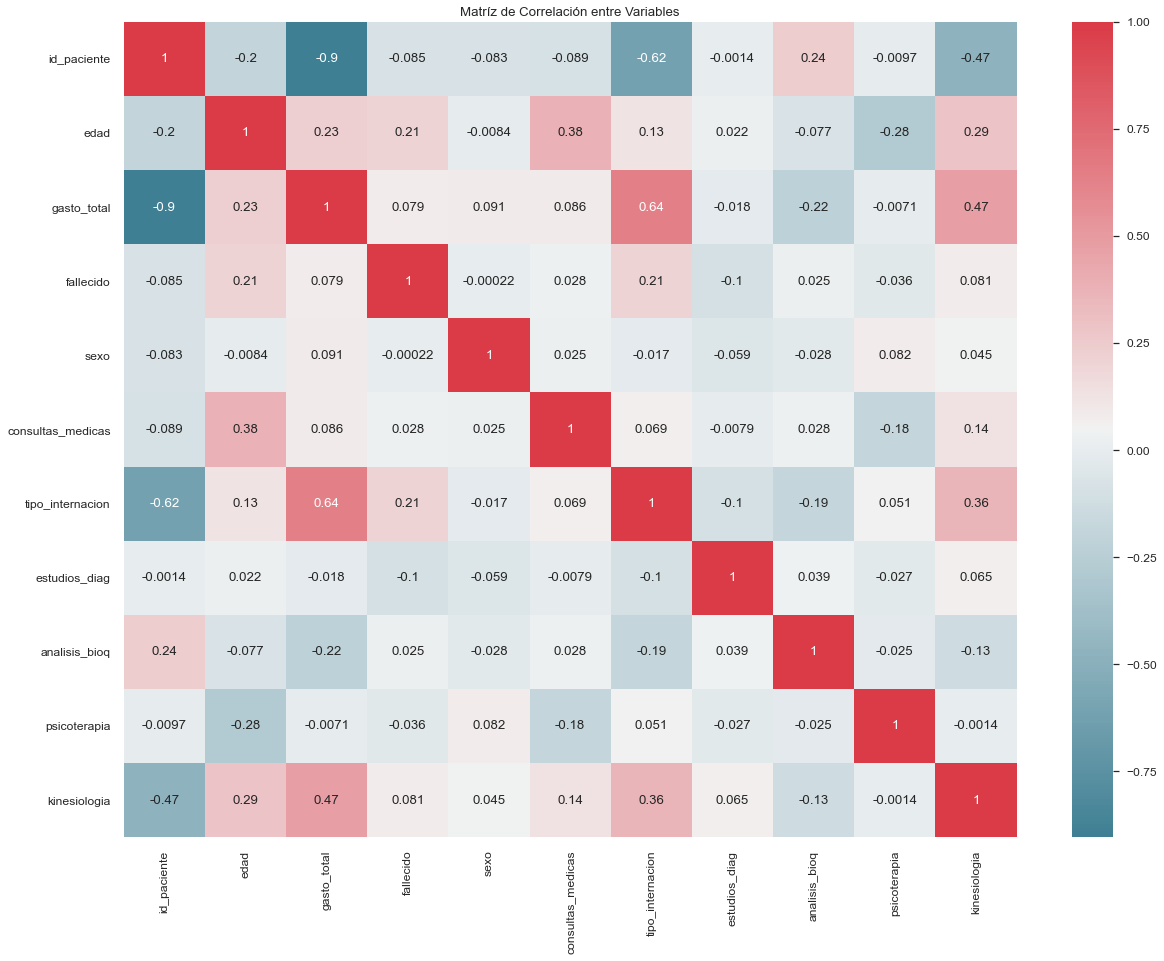

In [309]:
# Código para la Matriz de correlación entre variables

def correlation_heatmap(pacientes_covid):
    _, ax = plt.subplots(figsize = (20, 15))
    colormap= sns.diverging_palette(220, 10, as_cmap = True)
    sns.heatmap(pacientes_covid.corr(), annot=True, cmap = colormap)
    plt.title('Matríz de Correlación entre Variables')

correlation_heatmap(pacientes_covid) 

**Interpretación de la Matríz de Correlación entre Variables:**

No existe una fuerte relación entre las variables del dataset. Las variables que se encuentran más relacionadas son: 

- **Los montos totales de gastos con el tipo de internación.**

- **Las prácticas de kinesiología con los gastos totales y el tipo de internación.**

- **Las consultas médicas con la edad.**

- **Los fallecidos con la edad y el tipo de internación.**


<font color="firebrick"><u>**Conclusiones:**</u></font>

Para este análisis, utilizaré para graficar las variables **edad, gasto_total, fallecido y tipo_internacion, por ser las que más relación tienen.**

### <font color="firebrick"><u>**Voy a utilizar un Modelo de Aprendizaje automático no supervisado.**</u></font>

**----------------------------------------------------------------------------------------------------------------------**

### <font color="firebrick"><u>**TEST INICIALES**</u></font>

Hay 3 factores iniciales importantes para evaluar la agrupación: 
- Tendencia a la agrupación **(Test de Hopkins)**
- Número de clústeres, k **(Método del Codo)**
- Calidad de la agrupación **(aplicando diferentes métricas, se muestran más adelante)**

**---------------------------------------------------------------------------------------------------------------------**

### <font color="firebrick"><u>**TEST DE HOPKINS**</u></font>

**Calculo inicialmente el Test de Hopkins para asegurarme que el conjunto de datos tenga tendencia a agruparse.**

Los resultados se pueden analizar de esta forma:
- **Hipótesis nula (H 0)**: los puntos de datos se generaron mediante una distribución uniforme (no existen agrupaciones significativas).
- **Hipótesis alternativa (H 1)**: los puntos de datos se generan mediante puntos de datos aleatorios (presencia de clústeres).
- **HH~0.5**: la hipótesis nula puede rechazarse y es muy probable que los datos contengan clústeres Si H está más cerca de 0 entonces el conjunto de datos tiene tendencia a agruparse.

In [315]:
# Calculo Hopkins 

hopkins(pacientes_covid,pacientes_covid.shape[0])

0.1386914594849139

#### En este caso, como el valor está más cerca de 0 **(es positivo y menor a 0.5)**, entonces el conjunto de datos tiene tendencia a agruparse, es decir, a clusterizar.

Como el dataset es chico, puedo **escalar los datos** para llevar todos sus valores a una escala, eliminando la escasez y siguiendo el mismo concepto de Normalización y Estandarización.

In [316]:
# Calculo Hopkins con dataset escalado 

hopkins(scale(pacientes_covid),pacientes_covid.shape[0])

0.05442124012826885

#### El Test de Hopking da mejor con el dataset escalado.

### <font color="firebrick"><u>**METODO DEL CODO**</u></font>

Calculo el Método del codo para obtener el número óptimo de clústeres.
- Si k es demasiado alto, cada punto comenzará a representar en líneas generales un grupo.
- Si k es demasiado bajo, los puntos de datos se agrupan incorrectamente. 

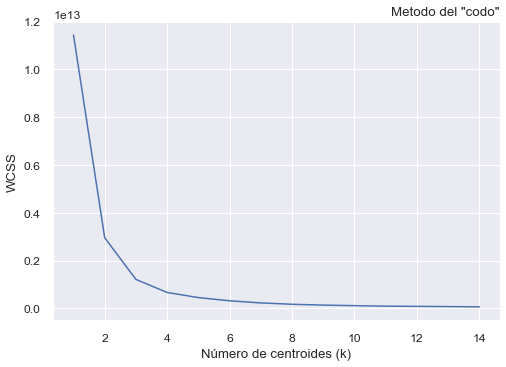

In [317]:
#Método del codo para encontrar el mejor número de K

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(pacientes_covid)
    wcss.append(km.inertia_)
plt.plot(K, wcss, 'bx-')
plt.xlabel('Número de centroides (k)')
plt.ylabel('WCSS')
plt.title('Metodo del "codo"', loc = 'right')
plt.show()

**Conclusión: consideraría k = 3 ó k = 4**.

### <font color="firebrick"><u>**ALGORITMO KMEANS**</u></font>

Lo aplico para k = 4.

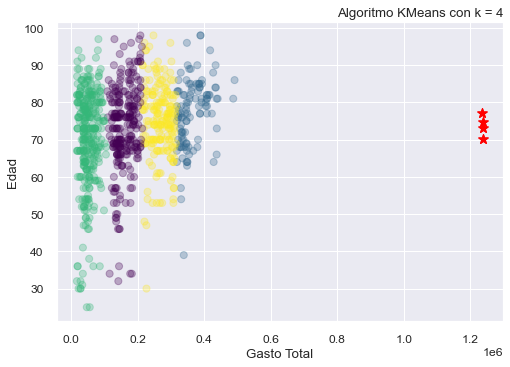

In [318]:
# Aplico Algoritmo KMeans, con k=4
kmeans = KMeans(n_clusters=4, random_state=0).fit(pacientes_covid)
y_kmeans = kmeans.predict(pacientes_covid)

#Para graficar utilizo las variables gasto_total y edad
plt.scatter(pacientes_covid['gasto_total'], pacientes_covid['edad'], c=y_kmeans, 
            s=50, alpha=0.3,cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker="*", s=100)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker="*", s=100)
plt.xlabel('Gasto Total')
plt.ylabel('Edad')
plt.title('Algoritmo KMeans con k = 4', loc = 'right')
plt.show()

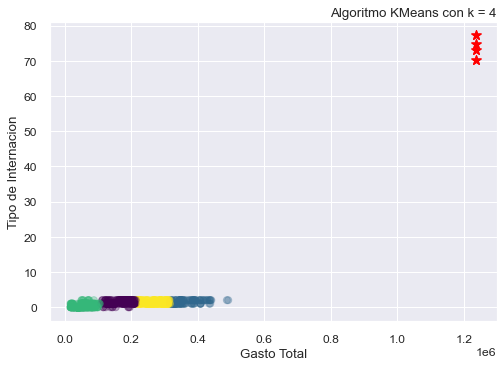

In [319]:
# Cambiando de variables
# Aplico Algoritmo KMeans, con k=4, y para graficar utilizo las variables gasto total y tipo de internación

kmeans = KMeans(n_clusters=4, random_state=0).fit(pacientes_covid)
y_kmeans = kmeans.predict(pacientes_covid)
plt.scatter(pacientes_covid['gasto_total'], pacientes_covid['tipo_internacion'], c=y_kmeans, 
            s=50, alpha=0.3,cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker="*", s=100)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker="*", s=100)
plt.xlabel('Gasto Total')
plt.ylabel('Tipo de Internacion')
plt.title('Algoritmo KMeans con k = 4', loc = 'right')
plt.show()

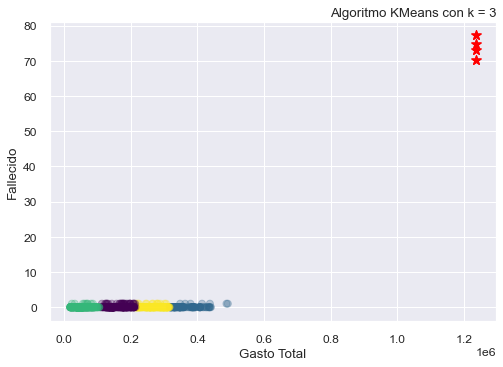

In [320]:
# Cambiando de variables
# Aplico Algoritmo KMeans, con k=4, y para graficar utilizo las variables gasto total y fallecido

kmeans = KMeans(n_clusters=4, random_state=0).fit(pacientes_covid)
y_kmeans = kmeans.predict(pacientes_covid)
plt.scatter(pacientes_covid['gasto_total'], pacientes_covid['fallecido'], c=y_kmeans, s=50, alpha=0.3,cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker="*", s=100)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker="*", s=100)
plt.xlabel('Gasto Total')
plt.ylabel('Fallecido')
plt.title('Algoritmo KMeans con k = 3', loc = 'right')
plt.show()

### <font color="firebrick"><u>**ALGORITMO FUZZY C-MEANS**</u></font>

Este algoritmo se utiliza para casos donde hay **puntos superpuestos**, como en este dataset.

Lo aplico para k = 4.

In [321]:
# Algoritmo Fuzzy C-Means.
# Lo aplico con k=4

X = np.array(pacientes_covid)
X

array([[1236221,      86,  491110, ...,       1,       0,       1],
       [1236222,      81,  487170, ...,       1,       1,       1],
       [1236223,      81,  440370, ...,       1,       0,       1],
       ...,
       [1237118,      65,   37881, ...,       1,       0,       0],
       [1237119,      64,   37508, ...,       1,       0,       0],
       [1237120,      72,   37395, ...,       1,       0,       1]],
      dtype=int64)

In [322]:
fcm = FCM(n_clusters=4)
fcm.fit(X)

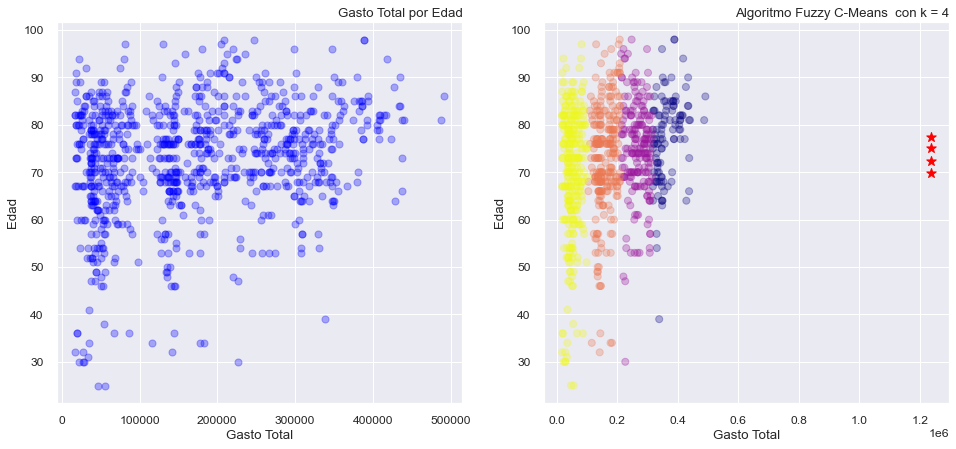

In [330]:
# Graficación
fcm_centers = fcm.centers
fcm_labels = fcm.predict(X)

# plot result, opciones de colores: 'viridis', 'plasma', 'inferno', 'magma', 'cividis'

f, axes = plt.subplots(1, 2, figsize=(16,7))
axes[0].scatter(pacientes_covid['gasto_total'], pacientes_covid['edad'], c='blue', s=50, alpha=0.3)
axes[1].scatter(pacientes_covid['gasto_total'], pacientes_covid['edad'], c=fcm_labels, 
                s=50, alpha=0.3, cmap='plasma')

axes[1].scatter(fcm_centers[:,0], fcm_centers[:,1], marker="*", s=100, c='red')

axes[0].set_xlabel('Gasto Total')
axes[0].set_ylabel('Edad')
axes[0].set_title('Gasto Total por Edad', loc = 'right')

axes[1].set_xlabel('Gasto Total')
axes[1].set_ylabel('Edad')
axes[1].set_title('Algoritmo Fuzzy C-Means  con k = 4', loc = 'right')

plt.show()

### <font color="firebrick"><u>**ALGORITMO DBSCAN**</u></font>

Es un **algoritmo de agrupamiento basado en la densidad**, que modela los clústers como cúmulos de alta densidad de puntos.
Es muy útil para la detección de outliers (valores atípicos), ya que considerará como “agrupados” todos aquellos puntos de la zonas más densas (normalmente puntos válidos) y considerará como anormales aquellos puntos alejados y en zonas poco densas (normalmente valores atípicos).

Tiene dos parámetros:
- un número épsilon (eps) 
- un número minPoints (min_samples)
- y se elige de inicio un punto arbitrario en el conjunto de datos. 

Si hay una cantidad de puntos mayor o igual a minPoints a una distancia épsilon del punto arbitrario, a partir de ese momento se consideran todos los puntos como parte de un clúster. A continuación, se expande ese grupo mediante la comprobación de todos los nuevos puntos y ver si ellos también tienen más puntos minPoints a una distancia épsilon, creciendo el clúster de forma recursiva en caso afirmativo.

Si el punto arbitrario escogido tiene menos de minPoints puntos en su círculo de radio épsilon, y tampoco es parte de cualquier otra agrupación, entonces, se considera un “punto de ruido” que no pertenecen a ningún grupo.

Primero voy a utilizar la **técnica del codo** también conocida como la famosa curva elbow para fijar un valor **min_samples** y, partir de ahí, graficar todas los radios eps de los puntos ordenados por distancia, de forma que, cuando los radios comienzan a aumentar de forma exponencial (el codo de la curva) significa que nos alejamos de la zona de alta densidad (valores normales) y entramos en la zona de baja densidad (valores atípicos).

In [331]:
# DBSCAN
data = pacientes_covid.iloc[:, [1, 2]].values
#pacientes_covid.head()
pacientes_covid.iloc[:, [1,2]]


edad  gasto_total
0      86       491110
1      81       487170
2      81       440370
3      73       437730
4      66       437270
..    ...          ...
895    76       145558
896    84       144946
897    65        37881
898    64        37508
899    72        37395

[900 rows x 2 columns]

**Calculo NearestNeighbors** para poder graficar las distancias y elegir un epsilon correcto. El valor por defecto del número de vecinos es 5.


In [339]:
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(pacientes_covid)
distances, indices = nbrs.kneighbors(pacientes_covid)

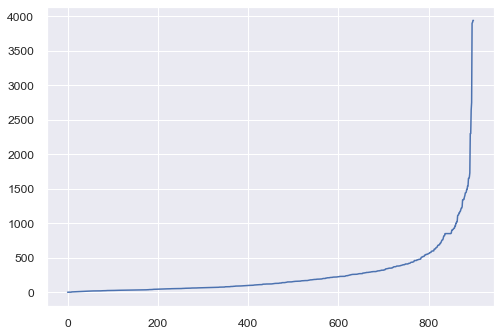

In [340]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances);

Podemos fijar el **valor del radio epsilon entre 120 y 125**, que es donde la curva comienza a crecer de forma exponencial.

Un valor de eps = 120 será mucho más restrictivo, eligiendo solo puntos de zonas muy densas, y un valor de eps = 125 será más “relajado”, permitiendo valores de zonas menos densas.

Como valor de **min_samples** para aplicar DBSCAN, voy a usar el valor por defecto que es 5.

Como **métrica para calcular la distancia**, voy a probar con algunos de los métodos disponibles.

In [375]:
# Ajustamos DBSCAN y predecimos Clusters
#eps : float, default=0.5
#        The maximum distance between two samples for one to be considered
#        as in the neighborhood of the other. This is not a maximum bound
#        on the distances of points within a cluster. This is the most
#        important DBSCAN parameter to choose appropriately for your data set
#        and distance function.

#    min_samples : int, default=5
#        The number of samples (or total weight) in a neighborhood for a point
#        to be considered as a core point. This includes the point itself.

# Valid values for metric are:
# From scikit-learn: [‘cityblock’, ‘cosine’, ‘euclidean’, ‘l1’, ‘l2’, ‘manhattan’]. 
#                    These metrics support sparse matrix inputs. 
#                    [‘nan_euclidean’] but it does not yet support sparse matrices.
# From scipy.spatial.distance: [‘braycurtis’, ‘canberra’, ‘chebyshev’, ‘correlation’, ‘dice’, ‘hamming’, ‘jaccard’, 
#                               ‘kulsinski’, ‘mahalanobis’, ‘minkowski’, ‘rogerstanimoto’, ‘russellrao’, ‘seuclidean’,
#                               ‘sokalmichener’, ‘sokalsneath’, ‘sqeuclidean’, ‘yule’] 
#                    These metrics do not support sparse matrix inputs.
# See the documentation for scipy.spatial.distance for details on these metrics. 

# Lo hago cambiando las métricas para medir distancias

#dbscan = DBSCAN(eps=120, min_samples=5, metric = 'sqeuclidean')
#Esto es lo que da: array([-1,  0], dtype=int64)

#dbscan = DBSCAN(eps=120, min_samples=5, metric = 'yule')
#dbscan = DBSCAN(eps=120, min_samples=5, metric = 'hamming')
#dbscan = DBSCAN(eps=120, min_samples=5, metric = 'jaccard')
#dbscan = DBSCAN(eps=120, min_samples=5, metric = 'cosine')
#dbscan = DBSCAN(eps=120, min_samples=5, metric = 'correlation')
#dbscan = DBSCAN(eps=120, min_samples=5, metric = 'dice')
#dbscan = DBSCAN(eps=120, min_samples=5, metric = 'kulsinski')
#dbscan = DBSCAN(eps=120, min_samples=5, metric = 'rogerstanimoto')
#dbscan = DBSCAN(eps=120, min_samples=5, metric = 'russellrao')
#dbscan = DBSCAN(eps=120, min_samples=5, metric = 'sokalmichener')
#dbscan = DBSCAN(eps=120, min_samples=5, metric = 'sokalsneath')
#dbscan = DBSCAN(eps=120, min_samples=5, metric = 'braycurtis')
#dbscan = DBSCAN(eps=120, min_samples=5, metric = 'canberra')
#Esto es lo que da: array([0], dtype=int64)

#dbscan = DBSCAN(eps=120, min_samples=5, metric = 'manhattan')
#dbscan = DBSCAN(eps=120, min_samples=5, metric = 'cityblock')
#dbscan = DBSCAN(eps=120, min_samples=5, metric = 'l1')
#Esto es lo que da: array([-1,  0,  1,  2,  3], dtype=int64)

#dbscan = DBSCAN(eps=120, min_samples=5, metric = 'euclidean')
#dbscan = DBSCAN(eps=120, min_samples=5, metric = 'l2')
#dbscan = DBSCAN(eps=120, min_samples=5, metric = 'nan_euclidean')
#Esto es lo que da: array([-1,  0,  1,  2,  3,  4], dtype=int64)


#dbscan = DBSCAN(eps=120, min_samples=5, metric = 'chebyshev')
#Esto es lo que da: array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64)

# Me quedo con la métrica manhattan, y el epsilon 120
dbscan = DBSCAN(eps=120, min_samples=5, metric = 'manhattan')
labels = dbscan.fit_predict(pacientes_covid) 
np.unique(labels)


array([-1,  0,  1,  2,  3], dtype=int64)

**La etiqueta -1 es ruido, el resto son los clusters.**

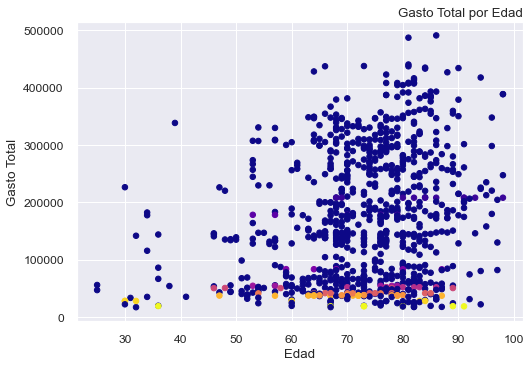

In [379]:
# Ejecutamos DBSCAN
dbscan = DBSCAN(eps=163, min_samples = 5, metric = "euclidean").fit(pacientes_covid)
clusters = dbscan.fit_predict(pacientes_covid)
df_values = pacientes_covid.values
# Graficación de los clústers.
plt.scatter(df_values[:, 1], df_values[:, 2], c=clusters, s=30, cmap="plasma")
#alpha=0.3, 
plt.xlabel('Edad')
plt.ylabel('Gasto Total')
plt.title('Gasto Total por Edad', loc = 'right')
plt.show()

### **Los ruidos son los azules, el resto son los clusters.**
**Los puntos en color azul oscuro son ruido y distorsionan el gráfico. Intento graficarlo de otra forma.**

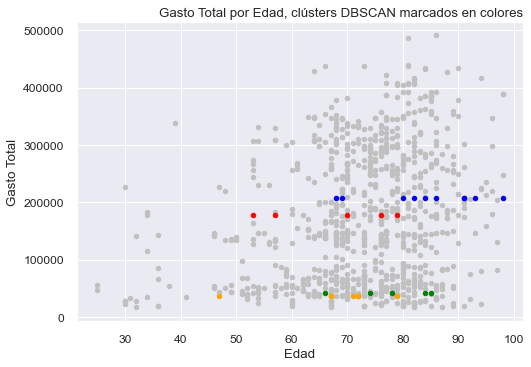

In [381]:
# Otra forma de graficarlos para que se visualice mejor.
plt.scatter(data[labels == -1, 0], data[labels == -1, 1], s = 20, c = 'silver')
plt.scatter(data[labels ==  0, 0], data[labels ==  0, 1], s = 20, c = 'blue')
plt.scatter(data[labels ==  1, 0], data[labels ==  1, 1], s = 20, c = 'red')
plt.scatter(data[labels ==  2, 0], data[labels ==  2, 1], s = 20, c = 'green')
plt.scatter(data[labels ==  3, 0], data[labels ==  3, 1], s = 20, c = 'orange')
plt.scatter(data[labels ==  4, 0], data[labels ==  4, 1], s = 20, c = 'yellow')
plt.scatter(data[labels ==  5, 0], data[labels ==  5, 1], s = 20, c = 'pink')      
plt.scatter(data[labels ==  6, 0], data[labels ==  6, 1], s = 20, c = 'black')
plt.scatter(data[labels ==  7, 0], data[labels ==  7, 1], s = 20, c = 'lightblue')
plt.xlabel('Edad')
plt.ylabel('Gasto Total')
plt.title('Gasto Total por Edad, clústers DBSCAN marcados en colores', loc = 'right')
plt.show()

### **Los ruidos son los grises, el resto son los clusters**

### **Conclusión:** este algoritmo no funcionó para este dataset, ya que la mayoría es ruido y hay muy pocos elementos agrupados.

### <font color="firebrick"><u>**ALGORITMO Agglomerative Clustering**</u></font>

El Hierarchical Clustering ó Agrupamiento Jerárquico puede ser clasificado en 2:

- Agglomerative (Bottom-up) Hierarchical Clustering
- Divisive (Top-down) Hierarchical Clustering

En el Agglomerative (Bottom-up) Hierarchical Clustering cada formación de clusters comienza con puntos individuales. Cada punto es considerado un cluster, entonces inicialmente habrá N puntos de datos. Luego se busca la distancia entre cada par de clusters cercanos y se forma un cluster (quedarán N-1 clusters). se repite este proceso hasta que todos los puntos sean clasificados dentro de un cluster.

Es decir, el proceso comienza con un punto de datos individual, de abajo hacia arriba y se mueve hacia arriba formando clústers.

Los diferentes parámetros son:

AgglomerativeClustering(
    n_clusters=2,
    *,
    affinity='euclidean',
    memory=None,
    connectivity=None,
    compute_full_tree='auto',
    linkage='ward',
    distance_threshold=None,
    compute_distances=False,
)

Hay dos parámetros que son muy importates y son: affinity y linkage. 
- **Affinity** es la métrica usada para calcular el enlace.
- **Linkage** es el criterio utilizado para determinar la distancia entre las observaciones.

In [382]:
#affinity : str or callable, default='euclidean'
#        Metric used to compute the linkage. Can be "euclidean", "l1", "l2",
#        "manhattan", "cosine", or "precomputed".
#        If linkage is "ward", only "euclidean" is accepted.
#        If "precomputed", a distance matrix (instead of a similarity matrix)
#        is needed as input for the fit method.
#linkage : {'ward', 'complete', 'average', 'single'}, default='ward'
#        Which linkage criterion to use. The linkage criterion determines which
#        distance to use between sets of observation. The algorithm will merge
#        the pairs of cluster that minimize this criterion.
#        - 'ward' minimizes the variance of the clusters being merged.
#        - 'average' uses the average of the distances of each observation of
#          the two sets.
#        - 'complete' or 'maximum' linkage uses the maximum distances between
#          all observations of the two sets.
#        - 'single' uses the minimum of the distances between all observations
#          of the two sets.
 
# Descartado
#cluster = AgglomerativeClustering(n_clusters=4, affinity='precomputed', linkage='average')
    
# Considerados
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
#cluster = AgglomerativeClustering(n_clusters=4, affinity='manhattan', linkage='complete')
#cluster = AgglomerativeClustering(n_clusters=4, affinity='cosine', linkage='complete')
#cluster = AgglomerativeClustering(n_clusters=4, affinity='cosine', linkage='average')

cluster.fit_predict(pacientes_covid)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

### El resultado muestra las etiquetas de los clústers de todos los puntos de datos.

### Ahora voy a dibujar los clústers:

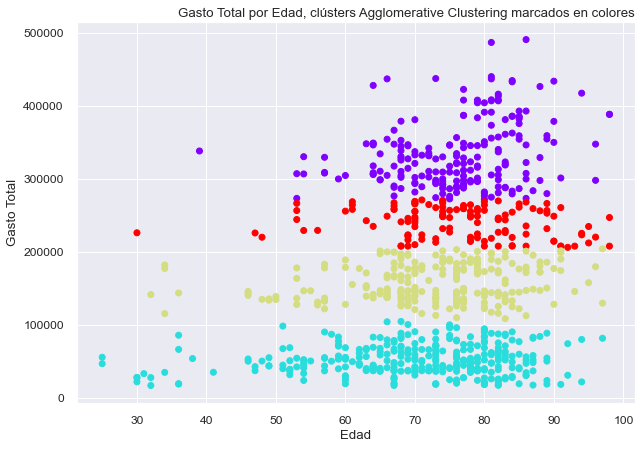

In [386]:
plt.figure(figsize=(10, 7))
plt.scatter(pacientes_covid.iloc[:,1], pacientes_covid.iloc[:,2], c=cluster.labels_, cmap='rainbow');
plt.xlabel('Edad')
plt.ylabel('Gasto Total')
plt.title('Gasto Total por Edad, clústers Agglomerative Clustering marcados en colores', loc = 'right')
plt.show()

### <font color="firebrick"><u>**ALGORITMO Affinity Propagation**</u></font>

Affinity Propagation (propagación por afinidad) es un algoritmo de agrupamiento basado en grafos, esto significa que el algoritmo no procesa distancias entre puntos. 
Trabaja con la matriz de similaridad, en vez de con la distancia euclídea. Esto hace que los puntos que esten cerca entre sí, tienen una alta similaridad y los más alejados tienen una baja similaridad, es decir se parecen poco.

Esto lo hace el algoritmo inicializando dos matrices distintas:
- La Matriz de Responsabilidad: es la matriz encargada de determinar la importancia que tiene cada punto de nuestro conjunto de datos.
- La Matriz de Disponibilidad: encargada de determinar la cantidad de puntos que tiene un punto al rededor, es decir sus vecinos.

Partiendo de estas dos matrices el algoritmo elegirá sus **Exemplars** que son aquellos puntos que serán el centro de los distintos clusters. Los puntos con mayor responsablidad y disponibilidad serán los elegidos.

Al contrario que otros algoritmos de clustering, a este no es necesario decirle el número de clusters que queremos.

Como desventaja, es un algoritmo de clustering que no descarta puntos, como por ejemplo si hace DBSCAN.

**Hiper-parámetros de Sklearn para Affinity Propagation:**
- **damping:** es el factor que controla el número de clusters, va de 0.5 a 1. Cuanto mayor es el dumping, menos clusters habrá.
- **affinity:** es para calcular la matriz de responsabilidad, hay dos tipos: 
    - **euclídea:** calcula la inversa a la distancia euclídea, a mayor distancia, menor es la similaridad entre dos puntos.
    - **precomputed:** si tenemos alguna matriz de distancias calculadas por nuestra cuenta, se la podemos pasar.
- **converge_iter:** fijamos un número de iteraciones, si el algoritmo no converge antes de este número, se para.
- **preference:** se basa en la matriz de responsabilidad y de disponibilidad, más preferencia, menos cantidad de clusters. Se recomienda poner una preferencia muy baja (menor de -1000) ya que si no el algoritmo inferirá una gran cantidad de clusters.
- **max_iter:** el número máximo de iteraciones del algoritmo

In [387]:
#AffinityPropagation(
#    *,
#    damping=0.5,
#    max_iter=200,
#    convergence_iter=15,
#    copy=True,
#    preference=None,
#    affinity='euclidean',
#    verbose=False,
#    random_state='warn',
#)

# Coloco el parámetro damping lo más alto posible para que encuentre la menor cantidad de clústers.
# También coloco el parámetro preference muy bajo para que sea menor la cantidad de clústers.

ap = AffinityPropagation(damping=0.8,
                         affinity='euclidean',
                         preference=-1000000.0,
                         max_iter=10000,
                         random_state=65)
preds = ap.fit_predict(pacientes_covid);

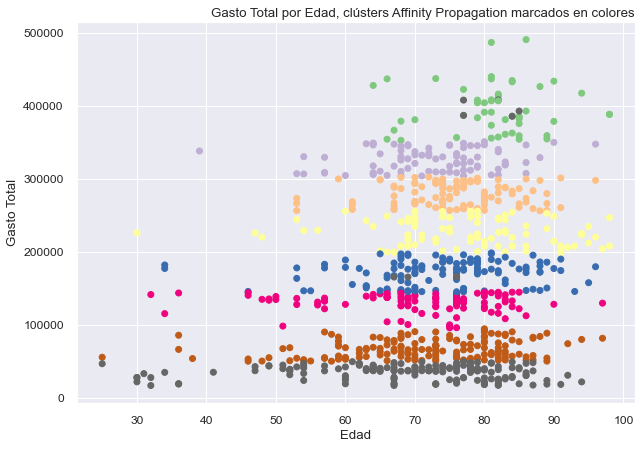

In [388]:
fig = plt.figure(figsize=(10,7))
plt.scatter(pacientes_covid['edad'], pacientes_covid['gasto_total'], c=preds, cmap='Accent')
plt.xlabel('Edad')
plt.ylabel('Gasto Total')
plt.title('Gasto Total por Edad, clústers Affinity Propagation marcados en colores', loc = 'right')
plt.show()

**Conclusiones:**
El algoritmo encontró 8 clústers.

Ahora lo grafico en 3D agregando el tipo de internación:

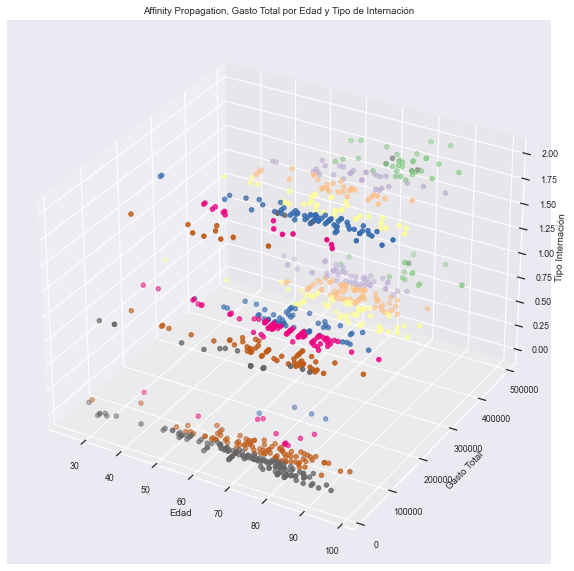

In [390]:
sns.set(style="darkgrid", font_scale=0.8)

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection="3d")
ax.scatter3D(pacientes_covid['edad'], pacientes_covid['gasto_total'], pacientes_covid['tipo_internacion'], c=preds, cmap='Accent')
ax.set_xlabel('Edad')
ax.set_ylabel('Gasto Total')
ax.set_zlabel('Tipo Internación')
ax.set_title('Affinity Propagation, Gasto Total por Edad y Tipo de Internación')
plt.show()

sns.set(style="darkgrid", font_scale=1.3)

### <font color="firebrick"><u>**DENDROGRAMA**</u></font>

Es un algoritmo de agrupación jerárquica. Puede ser útil cuando se desea flexibilidad en la cantidad de clústeres que se desea agrupar.

Un dendrograma se utiliza comúnmente para estudiar los **Clústering jerárquicos** antes de decidir el número de clústeres que resulta más apropiado para el conjunto de datos. La distancia a la que se combinan dos grupos se denomina distancia dendrograma. La distancia del dendrograma es una medida de si dos o más grupos están separados o pueden combinarse para formar un grupo.

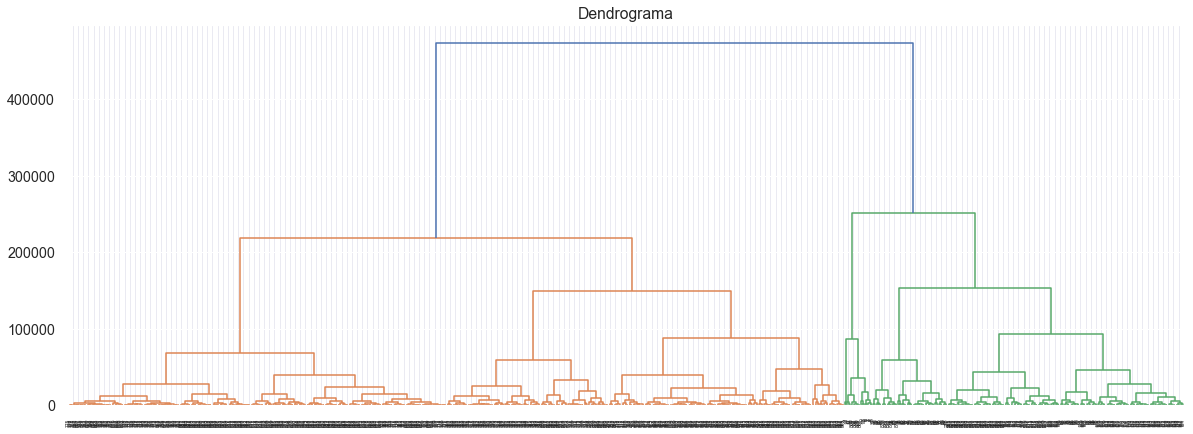

In [402]:
# Clustering Jerárquico, no indico el k. Varío los métodos para medir las distancias entre los clusters

import scipy.cluster.hierarchy as shc
plt.figure(figsize=(20, 7))  
plt.title("Dendrograma")  

# Metodos descartados
#dend = shc.dendrogram(shc.linkage(pacientes_covid, method='single'))
#dend = shc.dendrogram(shc.linkage(pacientes_covid, method='median'))

# Metodos considerados
#dend = shc.dendrogram(shc.linkage(pacientes_covid, method='ward'))
#dend = shc.dendrogram(shc.linkage(pacientes_covid, method='average'))
#dend = shc.dendrogram(shc.linkage(pacientes_covid, method='centroid'))
#dend = shc.dendrogram(shc.linkage(pacientes_covid, method='complete'))
#dend = shc.dendrogram(shc.linkage(pacientes_covid, method='weighted'))

# Elijo el método complete para medir las distancias entre los clusters
dend = shc.dendrogram(shc.linkage(pacientes_covid, method='complete'))

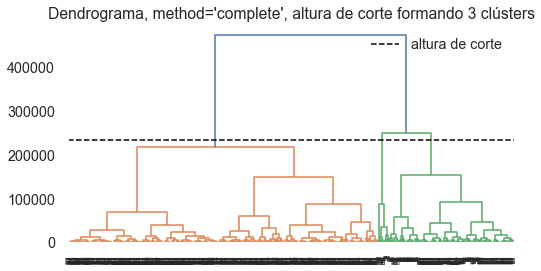

In [404]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
altura_corte = 235000
dend = shc.dendrogram(shc.linkage(pacientes_covid, method='complete'))
ax.set_title("Dendrograma, method='complete', altura de corte formando 3 clústers")
ax.axhline(y=altura_corte, c = 'black', linestyle='--', label='altura de corte')
ax.legend();

Para identificar el número de clusters se inspecciona visualmente el dendrograma y se decide a qué altura se corta para generar los clusters. 
### En este caso, el corte lo realicé en 235000 y se puede ver que se crearon 3 clústers.


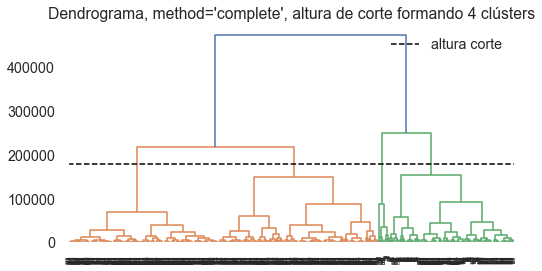

In [405]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
altura_corte = 180000
dend = shc.dendrogram(shc.linkage(pacientes_covid, method='complete'))
ax.set_title("Dendrograma, method='complete', altura de corte formando 4 clústers")
ax.axhline(y=altura_corte, c = 'black', linestyle='--', label='altura corte')
ax.legend();

### Si el corte lo realizo en 180000, se puede ver que se crearon 4 clústers.


### <font color="firebrick"><u>**METRICAS DE DESEMPEÑO DEL MODELO**</u></font>

Las métricas que utilicé son:

- Silhouette Score y gráfico de Silhouette.
- Indice Davies-Bouldin.
- V-measure Score.


### <font color="firebrick"><u>**GRAFICO DE SILHOUETTE:**</u></font>

In [406]:
# Nos quedamos sólo con dos variables para facilitar visualización 
covid1 = pacientes_covid.iloc[:, [1, 2]].values
#covid1

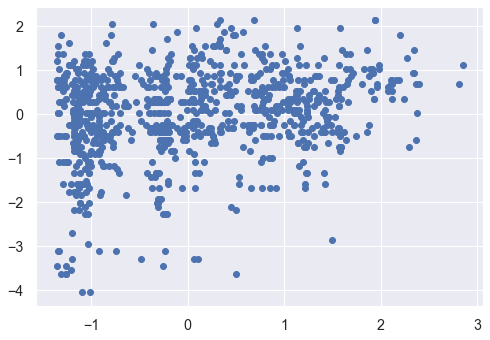

In [407]:
# Escalo el dataset
covid_scale = pd.DataFrame(scale(covid1))
plt.scatter(covid_scale[1],covid_scale[0]);

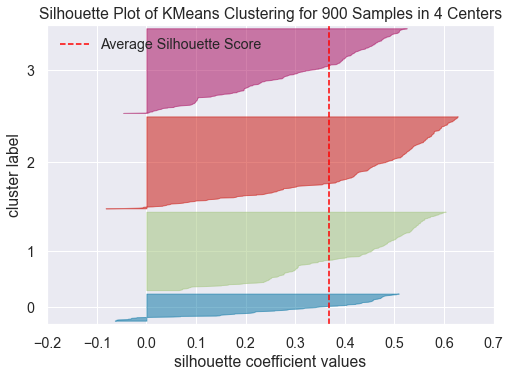

In [408]:
# Se usa K-medias y grafico Silhouette con k = 4

model = KMeans(4, random_state=42)
y_predict = km.fit_predict(covid_scale) # se ajusta a nuestros datos escalados
centroids  = km.cluster_centers_ # se definen los centroides
    
silhouette_vals = silhouette_samples(covid_scale,y_predict)

visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(covid_scale)    
visualizer.show() ;

### **Conclusiones del Gráfico de Silhouette:**

- **En el eje y la etiqueta del Cluster**.
- **En el eje x la Silhouette Score"**.

- El tamaño de las siluetas es proporcional al número de muestras dentro del grupo de análisis.
- Cuanto más altos sean los Silhouette Score (más cercanos a +1), más alejadas estarán las muestras del clúster de las muestras de los clústeres vecinos. 
- Un valor 0 indica que la muestra está en el límite o muy cerca del límite de decisión entre dos clústeres vecinos.
- Los valores negativos, en cambio, indican que esas muestras podrían haber sido asignadas al grupo incorrecto. 
- Al promediar los Silhouette Score, obtenemos un Silhouette Score global que se puede usar para describir la performance global.

### **En este caso el Slihouette Score promedio está cerca de 0.4 y es un buen valor. Hay pocos puntos negativos, lo que quiere decir que hay pocos puntos mal clasificados.**

## <font color="firebrick"><u>**Ahora genero Silhouette Score para k variando de 2 a 20**</u></font>

In [409]:
# Generamos clustering con Kmedias y calculamos silouette
# k e i indican la cantidad ed clusteres 
# Primero se itera usando el k en K means y luego i sirve para iterar dentro de cada cluster
avg_score_list=[]
for i,k in enumerate([2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]):         
# Se usa K-medias 
    km = KMeans(n_clusters=k) #se define el modelo
    y_predict = km.fit_predict(pacientes_covid) # se ajusta a nuestros datos
# Silhouette_samples -> Calcula el Silhouette Score para cada muestra
    silhouette_vals = silhouette_samples(pacientes_covid,y_predict)
# calculamos Silhouette
    for i,cluster in enumerate(np.unique(y_predict)):
      cluster_silhouette_vals = silhouette_vals[y_predict ==cluster]
      cluster_silhouette_vals.sort()               
# Calculo el valor promedio de los Silhouette Score
    avg_score = np.mean(silhouette_vals)
    avg_score_list_add=[k,avg_score]   
    avg_score_list.append(avg_score_list_add) 

In [410]:
avg_score_list

[[2, 0.6343499461912534],
 [3, 0.6543358555741204],
 [4, 0.6380897184538503],
 [5, 0.6259054441980074],
 [6, 0.6293774538459086],
 [7, 0.5856124594141479],
 [8, 0.5929242800343983],
 [9, 0.6034182379917437],
 [10, 0.5870852399761722],
 [11, 0.5875479345214925],
 [12, 0.5706723269806303],
 [13, 0.5520662777548603],
 [14, 0.5643821047192075],
 [15, 0.5632120314440473],
 [16, 0.5604495090582403],
 [17, 0.5654943811666502],
 [18, 0.5781670708342199],
 [19, 0.5759941893191718],
 [20, 0.5792023081159906]]

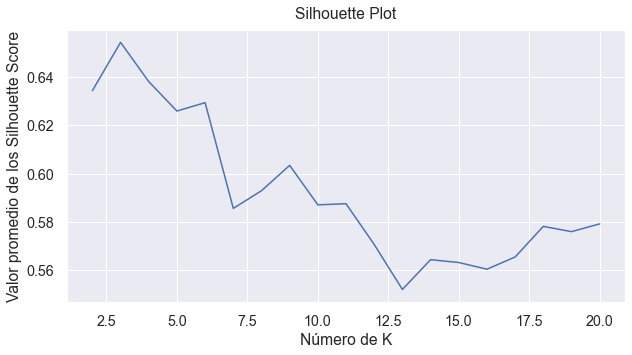

In [411]:
plt.figure(figsize=(10,5))
plt.xlabel('Número de K')
plt.ylabel('Valor promedio de los Silhouette Score')
plt.title('Silhouette Plot', y=1.02)
plt.plot(*zip(*avg_score_list))
plt.show()

### Esto muestra cómo varía el Silhouette promedio. Tendría que buscar el valor de K que da el punto más alto
### Me quedo con k = 3, 4 o 5

## <font color="firebrick"><u>**Silhouette, Davies Bouldin y V-measure Score**</u></font>

- **Silhouette Score y el gráfico de Silhouette** se utilizan para medir la distancia de separación entre grupos. Muestra una medida de la cercanía de cada punto de un cluster a los puntos de los clusters vecinos. Tiene un rango de −1,1 y es una gran herramienta para inspeccionar visualmente las similitudes dentro de los clústeres y las diferencias entre ellos. 

- El **índice de Davies-Bouldin** se define como la medida de similitud promedio de cada clúster con su clúster más similar. La similitud es la relación entre las distancias dentro de los clústeres y las distancias entre los clústeres. De esta manera, los clústeres que estén más separados y menos dispersos conducirán a una mejor puntuación.

- **V-measure Score** es una métrica exctrínseca de evaluación cuya ventaja principal es que es independiente de la cantidad de etiquetas de clase, la cantidad de clústeres, el tamaño de los datos y el algoritmo de agrupación utilizado y es una métrica muy confiable.

## **Ahora calculo estas métricas para k variando de 2 a 11**


In [412]:
# MAS METRICAS
scaler = MinMaxScaler()

In [413]:
X_scaled=scaler.fit_transform(pacientes_covid)

In [414]:
y=pacientes_covid['gasto_total']

In [415]:
km_scores= []
km_silhouette = []
vmeasure_score =[]
db_score = []
for i in range(2,11):
    km = KMeans(n_clusters=i, random_state=0).fit(X_scaled)
    preds = km.predict(X_scaled)
    
    print("WWS distancia al centroide para {} clusteres: {}".format(i,km.score(X_scaled)))
    km_scores.append(-km.score(X_scaled))
    
    silhouette = silhouette_score(X_scaled,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score para {} clusteres: {}".format(i,silhouette))
    
    db = davies_bouldin_score(X_scaled,preds)
    db_score.append(db)
    print("Davies Bouldin score para {} clusteres: {}".format(i,db))
    
    v_measure = v_measure_score(y,preds)
    vmeasure_score.append(v_measure)
    print("V-measure score para {} clusteres: {}".format(i,v_measure))
    print("-"*100)
    print("*"*100)

WWS distancia al centroide para 2 clusteres: -721.3410982137133
Silhouette score para 2 clusteres: 0.28212995284349063
Davies Bouldin score para 2 clusteres: 1.5308189315415512
V-measure score para 2 clusteres: 0.17782798238524375
----------------------------------------------------------------------------------------------------
****************************************************************************************************
WWS distancia al centroide para 3 clusteres: -589.2910813292049
Silhouette score para 3 clusteres: 0.2884259895207953
Davies Bouldin score para 3 clusteres: 1.375364446316042
V-measure score para 3 clusteres: 0.2716499836267713
----------------------------------------------------------------------------------------------------
****************************************************************************************************
WWS distancia al centroide para 4 clusteres: -505.9281793858094
Silhouette score para 4 clusteres: 0.3224502703429419
Davies Bouldin scor

### **El valor de k entre 3 y 4 sigue siendo el mejor.**

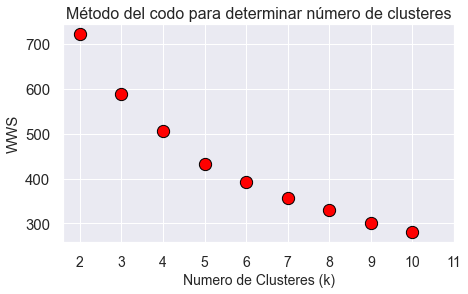

In [416]:
# Grafico el km_scores (WWS distancia al centroide ó método del codo) para los distintos valores de k.

plt.figure(figsize=(7,4))
plt.title("Método del codo para determinar número de clusteres",fontsize=16)
plt.scatter(x=[i for i in range(2,11)],y=km_scores,s=150, color = 'red', edgecolor='black')
plt.grid(True)
plt.xlabel("Numero de Clusteres (k)",fontsize=14)
plt.ylabel("WWS",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

**El valor de k entre 4 y 5 sería un buen valor, aunque no se nota tan marcado.**

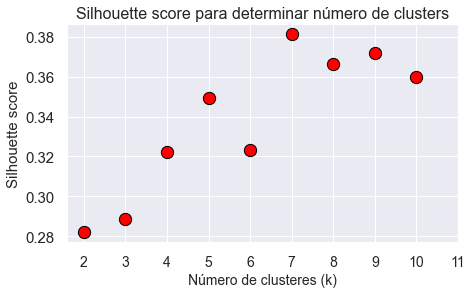

In [417]:
# Grafico el km_silhouette (Silhouette score) para los distintos valores de k.

plt.figure(figsize=(7,4))
plt.title("Silhouette score para determinar número de clusters",fontsize=16)
plt.scatter(x=[i for i in range(2,11)],y=km_silhouette,s=150, color = 'red', edgecolor='black')
plt.grid(True)
plt.xlabel("Número de clusteres (k)",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

**Cuanto más altos sean los Silhouette Score (más cercanos a +1), más alejadas estarán las muestras del clúster de las muestras de los clústeres vecinos.**

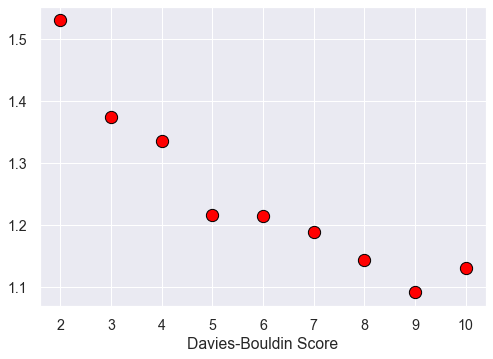

In [418]:
# Grafico el db_score (Davies Bouldin score) para los distintos valores de k.

plt.scatter(x=[i for i in range(2,11)],y=db_score,s=150, color = 'red', edgecolor='black')
plt.grid(True)
plt.xlabel("Davies-Bouldin Score")
plt.show()

**Cuánto más alejados están los clusters tienen una mejor puntuación con Davies Bouldin score.**

## <font color="firebrick"><u>**DESCRIPCION DE LOS CLUSTERS**</u></font>


In [419]:
#Generamos modelo con 4 clusteres
model = KMeans(n_clusters=4, random_state=42)
model.fit(pacientes_covid)
model.labels_.shape

(900,)

In [420]:
pacientes_covid.shape

(900, 11)

In [421]:
# agregué la columna cluster
pacientes_covid["Cluster"] = model.labels_
pacientes_covid.head()

id_paciente  edad  gasto_total  fallecido  sexo  consultas_medicas  \
0      1236221    86       491110          1     1                  1   
1      1236222    81       487170          1     1                  1   
2      1236223    81       440370          0     1                  1   
3      1236224    73       437730          0     0                  1   
4      1236225    66       437270          1     0                  1   

   tipo_internacion  estudios_diag  analisis_bioq  psicoterapia  kinesiologia  \
0                 2              1              1             0             1   
1                 2              1              1             1             1   
2                 2              1              1             0             1   
3                 2              1              1             0             1   
4                 2              1              1             0             1   

   Cluster  
0        0  
1        0  
2        0  
3        0  
4        0

In [431]:
# las agrupé por diferentes criterios de acuerdo al significado de la columna
# mean seria el promedio, median es la mediana, min el mínimo valor, max el máximo valor, count la cantidad

pacientes_covid.groupby('Cluster').agg({
    'edad':['count','mean','median','min','max'],
    'gasto_total':['mean','median','std','min','max'],
    'fallecido':['mean','median'],
    'tipo_internacion':['mean','median']
    }).round(1).reset_index()


Cluster  edad                      gasto_total                           \
          count  mean median min max        mean  median      std     min   
0       0   112  77.2     79  39  98    365194.0  350740  38806.4  317600   
1       1   262  73.1     74  32  98    160167.7  150824  26898.8  108689   
2       2   327  70.2     73  25  97     51759.1   49385  20659.6   17129   
3       3   199  74.8     75  30  98    268106.9  267500  29013.5  214500   

          fallecido        tipo_internacion         
      max      mean median             mean median  
0  491110       0.1      0              1.5      2  
1  213350       0.1      0              1.3      1  
2  104884       0.0      0              0.3      0  
3  316160       0.1      0              1.3      1

In [433]:
pacientes_covid.groupby('Cluster').agg({
    'sexo':['mean','median'],
    'consultas_medicas':['median'],
    'estudios_diag':['sum','median'],
    'analisis_bioq':['sum','median'],
    'psicoterapia':['sum','median'],
    'kinesiologia':['sum','median'],
    }).round(1).reset_index()

Cluster sexo        consultas_medicas estudios_diag        analisis_bioq  \
          mean median            median           sum median           sum   
0       0  0.7      1                 1           111      1            82   
1       1  0.6      1                 1           258      1           211   
2       2  0.6      1                 1           327      1           298   
3       3  0.7      1                 1           199      1           133   

         psicoterapia        kinesiologia         
  median          sum median          sum median  
0      1            9      0          110      1  
1      1           26      0          158      1  
2      1           31      0          129      0  
3      1           18      0          162      1

### Descripción de los 4 clusters:

#### - 0: **Internados en UTI**, Pacientes Covid internados en UTI con consumo general elevado
#### - 1: **Internados en Piso**, Pacientes Covid internados en piso con consumo general moderado
#### - 2: **No internados**, Pacientes Covid no internados con consumo general moderado a bajo
#### - 3: **Internados en Piso**, Pacientes Covid internados en piso con consumo general elevado

En todos los casos se evidencia consumo de consultas médicas, estudios de diagnóstico y análisis bioquímico.
La psicoterapia mostró ser un rubro irrelevante para los pacientes Covid.
La kinesiología sí es un rubro a considerar en pacientes internados por Covid.

Estas son las variables más importantes del dataset.
Depende de cada una agrupo por cantidad, promedio, mediana, mínimo y máximo.
En el caso del gasto total, que es la más importante del estudio, agrego el **desvío estándar** como la medida de dispersión más común, que indica qué tan dispersos están los datos con respecto a la media. Cuanto mayor sea el desvío estándar, mayor será la dispersión de los datos.

Una desviación estándar baja indica que la mayor parte de los datos de una muestra tienden a estar agrupados cerca de su media (también denominada el valor esperado), mientras que una desviación estándar alta indica que los datos se extienden sobre un rango de valores más amplio.

**Para este dataset, el desvío estándar muestra que hay mayor dispersión de gasto total en los clústers 1 y 2, que son los pacientes no internados o internados en piso con gastos moderados a bajo. Los pacientes internados en UTI o piso con gastos elevados, el desvío estándar se acerca más a la media, mostrando que no están tan dispersos.**

### **Algunos Gráficos de los clústers:**

c:\users\viviana\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


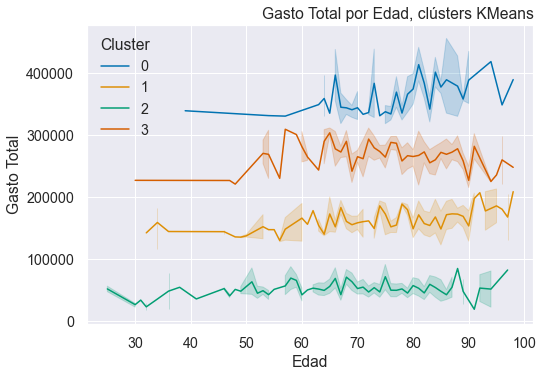

In [434]:
sns.lineplot('edad', 'gasto_total', hue='Cluster', data=pacientes_covid, palette="colorblind")
plt.xlabel('Edad')
plt.ylabel('Gasto Total')
plt.title('Gasto Total por Edad, clústers KMeans', loc = 'right')
plt.show();

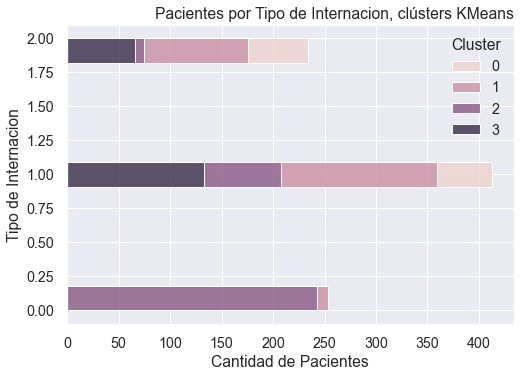

In [446]:
sns.histplot(y="tipo_internacion", hue='Cluster', data=pacientes_covid, multiple = "stack");
plt.xlabel('Cantidad de Pacientes')
plt.ylabel('Tipo de Internacion')
plt.title('Pacientes por Tipo de Internacion, clústers KMeans', loc = 'right')
plt.show();

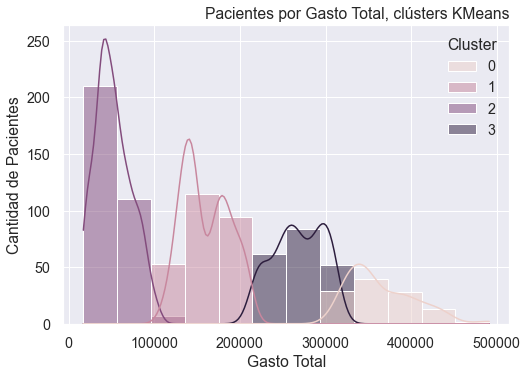

In [447]:
sns.histplot(x="gasto_total", hue="Cluster", data=pacientes_covid, kde=True, color="royalblue")
plt.xlabel('Gasto Total')
plt.ylabel('Cantidad de Pacientes')
plt.title('Pacientes por Gasto Total, clústers KMeans', loc = 'right')
plt.show();

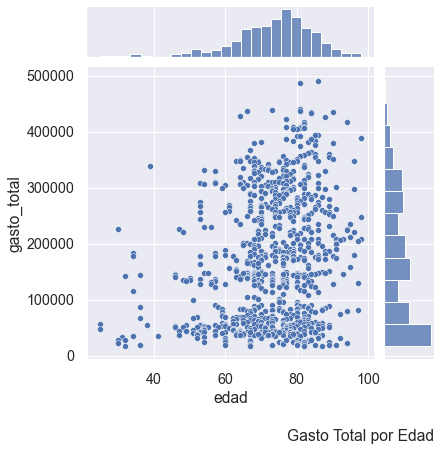

In [462]:
sns.jointplot(x="edad", y="gasto_total", data=pacientes_covid)
plt.title('Gasto Total por Edad', loc = 'right', y=-0.3)
plt.show();

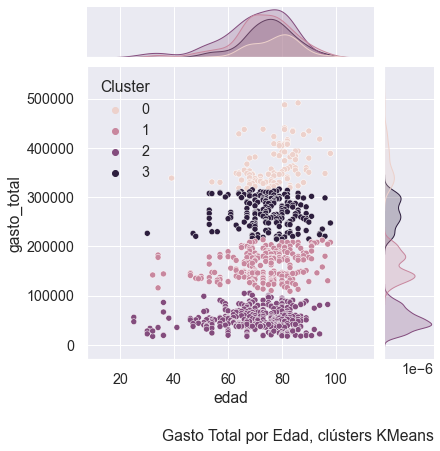

In [463]:
sns.jointplot(x="edad", y="gasto_total", hue="Cluster", data=pacientes_covid)
plt.title('Gasto Total por Edad, clústers KMeans', loc = 'right', y=-0.3)
plt.show();

In [538]:
line = alt.Chart(pacientes_covid).mark_circle().encode(
    x=alt.X('edad', title='Edad'),
    y=alt.Y('Cluster', title='Cluster'),
    color='Cluster'
).properties(
    title='Clusters KMeans por Edad',
    width=280,
    height=280
)

point = alt.Chart(pacientes_covid).mark_circle().encode(
    x=alt.X('edad', title='Edad'),
    y=alt.Y('gasto_total', title='Gasto Total'),
    color="Cluster"
).properties(
    title='Gasto Total por Edad, clústers KMeans',
    width=280,
    height=280
)

line | point

alt.HConcatChart(...)

In [540]:
alt.Chart(pacientes_covid).mark_point().encode(
    x='edad:Q',
    y='gasto_total:Q',
    color='Cluster:N'
).properties(
    title='Gasto Total por Edad, clústers KMeans (SE PUEDE HACER ZOOM +/-)'
).interactive()

alt.Chart(...)

In [542]:
brush = alt.selection_interval()

chart = alt.Chart(pacientes_covid).mark_point().encode(
    y='gasto_total:Q',
    color=alt.condition(brush, 'Cluster:N', alt.value('dimgray'))
).properties(
    width=300,
    height=300
).add_selection(
    brush
)

chart.encode(x='edad') | chart.encode(x='tipo_internacion')

alt.HConcatChart(...)

In [464]:
# Calculo y muestro el promedio de la población de cada clúster

cluster_avg = pacientes_covid.groupby('Cluster').mean()
population_avg = pacientes_covid.mean()
relative_imp = cluster_avg / population_avg - 1
relative_imp

Cluster  analisis_bioq  consultas_medicas      edad  estudios_diag  \
Cluster                                                                       
0            NaN      -0.089878           0.011236  0.059248      -0.003392   
1            NaN       0.001118           0.003517  0.002146      -0.009766   
2            NaN       0.132850          -0.010411 -0.037719       0.005587   
3            NaN      -0.169188           0.006154  0.025808       0.005587   

         fallecido  gasto_total  id_paciente  kinesiologia  psicoterapia  \
Cluster                                                                    
0        -0.013158     1.146178    -0.000269      0.581268     -0.139031   
1         0.687425    -0.058724    -0.000003     -0.029073      0.063250   
2        -0.565427    -0.695821     0.000217     -0.364855      0.015727   
3         0.031473     0.575615    -0.000200      0.310668     -0.030869   

             sexo  tipo_internacion  
Cluster                              
0        0.104366          0.550592  
1       -0.086868          0.376385  
2       -0.029481         -0.709463  
3        0.104074          0.360377

## **Exportación del Dataset con el agregado de la columna Cluster y el valor asignado para cada registro:**

In [465]:
pacientes_covid.to_excel("clusters_pacientes_covid.xlsx")

**FIN !!!**

Gracias Totales!